# **Eploratory Data analysis of FIFA20 Dataset**
 dataset url : https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset

---
## The following conclusions were obtained after analysis:
- max age of player= *42*, min age of players= *16*
- overall rating increases with weight
- the age *28* belongs to the max players in top 20
- features like stamina, passing, dribbling, pace **increases** till certain age(around 30)  after which it goes down.
- N. Barrios is the shortest player of height **156**  cm and T. Holý is the tallest player of height **205**  cm
- overall rating is not affected by height
- the height **187** cm belongs to the max players in top 20
- As height increases, features like stamina, dribbling, pace, passing decreases.
- B. Al Mutairi is the lightest player of weight **50** kg and A. Akinfenwa is the heaviest player of weight **110** kg
- weight doesnt affect overall rating that much
- value in euro **increases** as overall rating **increases** and players of **lesser** age with higher overall rating have higher value in euros.
- Wage increases for player of older age having higher potential rating
- Most players Preffer **Right** foot while playing
- Top overall :  L. Messi --> 94
-Top potential :  K. Mbappé --> 95
-Top value_eur :  Neymar Jr --> 105500000
-Top wage_eur :  L. Messi --> 565000
- Dominican Republic has highest mean wage



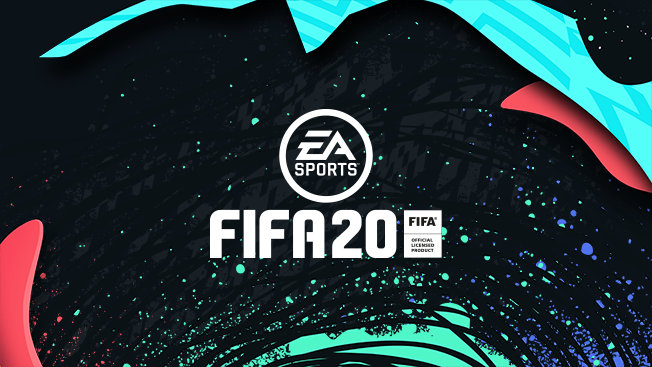

# Importing some basic libraries and reading the dataset

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

#importing the dataset
df1 =pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_20.csv')
df1.head()

# Displaying some information about the dataset

In [ ]:
#Printing out some information about the data
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)
eda(df1)

In [ ]:
#checking for null values
df1.isnull().any()

# We will analyse the few features from the dataset as listed below

In [ ]:
# First we will analyse a few of the features
df=df1[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'body_type', 'real_face',
       'release_clause_eur']]

In [ ]:
#plot histograms for each variables
df.hist(figsize=(20,20))
plt.show()

In [ ]:
df.describe()

In [ ]:
#checking for null values
df.isnull().any()

# Effect of **Age** on overall rating

---


In [ ]:
plt.figure(dpi=125)
sns.distplot(a=df['age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(df['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [ ]:
#checking which features have a strong correlation with age
import scipy.stats 

x=[x for x in df.columns]
y = ['age']
corrs = []
for col in x:
    corr = scipy.stats.spearmanr(df['age'], df[col])
    corrs.append({
        'feature': col,
        'correlation': corr[0],
        'correlation_p_value': corr[1]
    })
    
pd.DataFrame(corrs).sort_values('correlation')


In [ ]:

#plotting correlation heatmap
correlation=df.corr()
correlation
import seaborn as sns
sns.heatmap(correlation, cmap="Reds")

In [ ]:
print("The age of the youngest player is", df['age'].min())
print("The age of the oldest player is", df['age'].max())

In [ ]:
sns.lmplot(x="age", y="overall",data=df,markers=".",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs age");
plt.show()

# How **age** affects different factors like stamina, dribbling, pace, passing

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 9)

sns.lineplot(x='age', y='power_stamina', data=df1, legend='brief', label='stamina')
sns.lineplot(x='age', y='dribbling', data=df1, legend='brief', label='dribbling')
sns.lineplot(x='age', y='pace', data=df1, legend='brief', label='pace')
sns.lineplot(x='age', y='passing', data=df1, legend='brief', label='passing')

In [ ]:
plt.figure(figsize=(11,9))
sns.countplot('age',data=df.head(20))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# ***Observations***-

---


- max age of player= *42*, min age of players= *16*
- overall rating increases with weight
- the age *28* belongs to the max players in top 20
- features like stamina, passing, dribbling, pace increases till certain age after which it goes down.



# Effect of **height** on overall rating

In [ ]:
plt.figure(dpi=125)
sns.distplot(a=df['height_cm'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(df['height_cm']),c='green',ls='--',label='Mean height of All Players')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

In [ ]:
#displaying the tallest and shortest player

print(list(df.loc[df['height_cm'] == df['height_cm'].min()]['short_name'])[0],'is the shortest player of height',df['height_cm'].min(),' cm')
print(list(df.loc[df['height_cm'] == df['height_cm'].max()]['short_name'])[0],'is the tallest player of height',df['height_cm'].max(),' cm')

In [ ]:
# plotting overall rating vs height
sns.lmplot(x="height_cm", y="overall",data=df,markers=".",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs height");
plt.show()

In [ ]:

plt.figure(figsize=(13,9))
sns.countplot('height_cm',data=df.head(20))
plt.xlabel('height_cm')
plt.ylabel('Count')
plt.title('Which height belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# How **Height** affects different factors like stamina, dribbling, pace, passing

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 9)

sns.lineplot(x='height_cm', y='power_stamina', data=df1, legend='brief', label='stamina')
sns.lineplot(x='height_cm', y='dribbling', data=df1, legend='brief', label='dribbling')
sns.lineplot(x='height_cm', y='pace', data=df1, legend='brief', label='pace')
sns.lineplot(x='height_cm', y='passing', data=df1, legend='brief', label='passing')

# ***Observations-***

---


- N. Barrios is the shortest player of height **156**  cm
- T. Holý is the tallest player of height **205**  cm
- overall rating is not affected by height
- the height **187** cm belongs to the max players in top 20
- As height increases, features like stamina, dribbling, pace, passing decreases.

# Effect of **Weight** on overall rating

In [ ]:
plt.figure(dpi=125)
sns.distplot(a=df['weight_kg'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(df['weight_kg']),c='green',ls='--',label='Mean weight of All Players')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Count')
plt.title('Distribution of weight')
plt.show()

In [ ]:
# displaying the heaviest and the lightest players

print(list(df.loc[df['weight_kg'] == df['weight_kg'].min()]['short_name'])[0],'is the lightest player of weight',df['weight_kg'].min(),'kg')
print(list(df.loc[df['weight_kg'] == df['weight_kg'].max()]['short_name'])[0],'is the heaviest player of weight',df['weight_kg'].max(),'kg')


# Plotting the relation between overall rating vs Weight

In [ ]:
sns.lmplot(x="weight_kg", y="overall",data=df,markers=".",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs weight");
plt.show()

In [ ]:

plt.figure(figsize=(13,9))
sns.countplot('weight_kg',data=df.head(20))
plt.xlabel('weight_kg')
plt.ylabel('Count')
plt.title('Which weight belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# How **weight** affects different factors like stamina, dribbling, pace, passing

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 9)

sns.lineplot(x='weight_kg', y='power_stamina', data=df1, legend='brief', label='stamina')
sns.lineplot(x='weight_kg', y='dribbling', data=df1, legend='brief', label='dribbling')
sns.lineplot(x='weight_kg', y='pace', data=df1, legend='brief', label='pace')
sns.lineplot(x='weight_kg', y='passing', data=df1, legend='brief', label='passing')

# ***OBSERVATIONS-***

---


- B. Al Mutairi is the lightest player of weight **50** kg
- A. Akinfenwa is the heaviest player of weight **110** kg
- weight doesnt affect overall rating that much

# Relation between **overall rating** and **value in Euros**

In [ ]:
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis', sizes=(15, 200),aspect=2,data=df)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()


## Thus we can see value in euro increases as overall rating increases and players of lesser age with higher overall rating have higher value in euros.


---



# Relation between **potential Rating** and **wage in Euros**

In [ ]:
sns.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis', sizes=(15, 200),aspect=2,data=df)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

## Wage increases for player of older age having higher potential rating

---



# **Preffered foot** while playing

In [ ]:
plt.figure(dpi=125)
sns.countplot('preferred_foot',data=df,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=df.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

## We can see that most players prefer **right foot** while playing.

---



# Count of International Reputation of Top 100 players

In [ ]:
plt.figure(dpi=125)
sns.countplot('international_reputation',data=df.head(100),palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

# Country with max count of Top 20 players

In [ ]:
plt.figure(figsize=(14,7),dpi=100)
sns.countplot(x='nationality',data=df.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

# Club having max players in top 20

In [ ]:
plt.figure(figsize=(14,7),dpi=100)
sns.countplot('club',data=df.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

# Relation Between Movement balance and pace

In [ ]:
sns.lmplot(x = 'pace', y = 'movement_balance', data = df1, col = 'preferred_foot',scatter_kws = {'alpha':0.3,'color':'orange'},
           line_kws={'color':'red'})

# Relation between finishing ability and shooting


In [ ]:
sns.jointplot(x="attacking_finishing", y="shooting", data=df1, kind="hex", color="#4CB391")

# Dribbling vs (speed-balance)

In [ ]:
sns.jointplot(x='dribbling', y="movement_balance", data=df1, kind="kde", space=0, color="blue")
sns.jointplot(x="dribbling", y="pace", data=df1, kind="kde", space=0, color="red")

# Plotting top 10 countries with highest mean wage

In [ ]:
avgwageoverall = df.groupby("nationality", as_index=False)["wage_eur","overall"].mean()
avgwageoverall.sort_values(by="wage_eur",inplace=True,ascending=False)
top10bywage = avgwageoverall.iloc[0:10,:]
sns.catplot(y="nationality",
            x="wage_eur",data=top10bywage,
            palette="Blues",height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",
          fontsize=30);

# ***Analysis of a few player***

---



In [ ]:
metrics = ['overall', 'potential', 'value_eur', 'wage_eur']

for i in metrics:
    best_Overall = df1.loc[df[i] == df1[i].max(), ['short_name', i]].values.tolist()
    print('Top', i, ': ', best_Overall[0][0], '-->', best_Overall[0][1])

# ***Comparison between a few players***

---



## **MESSI & RONALDO**

In [ ]:
df2=df1[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
rival = df2.head(2)
rival= rival.set_index('short_name')
rival.head()

In [ ]:
# finding the row values of Messi

values = rival.iloc[0].tolist()
values += values [:1]
values

In [ ]:
# Finding the row values of Ronaldo

values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

In [ ]:
# Defining a function for Radar Chart

from math import pi

def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

In [ ]:
# Plotting the Radar Chart for Messi and Ronaldo
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

# **Messi** performed better than Ronaldo in **5 on 8** factors- 
1. Passing
2. dribbling 
3. defendng
4. overall rating
5. rating potential

# **Ronaldo** performed better than Messi in **3 out of 8** factors - 

1. Physical
2. Shooting
3. Pace

---



# Top two Midfielders as per the dataset i.e **De Bryne and Modric**

In [ ]:
column_r=['short_name','age','team_position','overall','potential','pace','shooting','passing','dribbling','defending','physic']
riv = df1[column_r]
riv = riv.set_index(['short_name','team_position','age'])

In [ ]:

def Radarchart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,value)
    ax.fill(angles, value, 'teal', alpha=0.1)

    ax.plot(angles2,value2)
    ax.fill(angles2, value2, 'red', alpha=0.1)
    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

In [ ]:
# values for De Bryne - Man City's Midfielder

value = riv.iloc[5].tolist()
value += value[:1]
value

In [ ]:
#values for Modric - Madrid's Midfielder

value2 = riv.iloc[8].tolist()
value2 += value2[:1]
value2

In [ ]:
# Plotting the Radar Chart for De Bryne and Modric
Radarchart("De Bryne",[91.0, 91.0, 76.0, 86.0, 92.0, 86.0, 61.0, 78.0, 91.0],"Modric",[90.0, 90.0, 74.0, 76.0, 89.0, 89.0, 72.0, 66.0, 90.0])

# **De Bryne** performed better than Modric in **6 on 8** factors- 
1. Passing
2. Shooting
3. Pace
4. overall rating
5. rating potential
6. Physical
# **Modric** performed better than De Bryne in **2 out of 8** factors - 
1. Dribbling
2. Defending

---



#  Top two Defenders i.e **Ramos** and **Van Dijk**

In [ ]:
#values for Ramos

value = riv.iloc[18].tolist()
value += value[:1]
value


In [ ]:
# values for Van Dijk 

value2 = riv.iloc[7].tolist()
value2 += value2[:1]
value2

In [ ]:
# Plotting Radar chart for Ramos and van dijk

Radarchart("Ramos",[89.0, 89.0, 72.0, 68.0, 75.0, 73.0, 87.0, 85.0, 89.0],"Van Dijk",[90.0, 91.0, 77.0, 60.0, 70.0, 71.0, 90.0, 86.0, 90.0])


# **Ramos** performed better than Van Dijk in **3 on 8** factors- 
1. Passing
2. Shooting
3. Dribbling

# **Van Dijk** performed better than Ramos in **5 out of 8** factors - 
1. Physical
2. Defending
3. overall rating
4. Potential rating
5. Pace

---

